# k 近傍法

k-Nearest Neighbor (kNN)

$$
d^{(i)} = \| \boldsymbol{x} - \boldsymbol{x}^{(i)} \|
$$



In [20]:
import numpy
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot(classifier, data, labels, title=None, xlabel=None, ylabel=None):
    unique_labels = np.unique(labels)
    colors = ['red', 'blue', 'green', 'cyan', 'orange'][:len(unique_labels)]
    x1max, x1min = np.max(data[:, 0]), np.min(data[:, 0])
    x2max, x2min = np.max(data[:, 1]), np.min(data[:, 1])
    scale_x1 = x1max - x1min
    scale_x2 = x2max - x2min
    x1max, x1min = x1max + (x1max-x1min)*0.05, x1min - (x1max-x1min)*0.05
    x2max, x2min = x2max + (x2max-x2min)*0.05, x2min - (x2max-x2min)*0.05
    resolution = scale_x1 / 300
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    z = np.array([classifier.predict(x) for x in np.array([xx1.ravel(), xx2.ravel()]).T])
    z = z.reshape(xx1.shape)
    if title is not None:
        plt.title(title)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=ListedColormap(colors))
    
    data_of_each_label = {}
    for d, l in zip(data, labels):
        if l in data_of_each_label:
            data_of_each_label[l].append(d)
        else:
            data_of_each_label[l] = [d]
    
    for i in range(len(unique_labels)):
        data = data_of_each_label[unique_labels[i]]
        plt.scatter(np.array(data)[:, 0], np.array(data)[:, 1], s=5, c=colors[i])
    plt.show()

In [21]:
import numpy as np

class KNN:
    def __init__(self, k, data, labels):
        self.k = k
        self.m = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        self.data = self.__standardize(data)
        self.labels = labels
    
    def predict(self, x):
        x_st = self.__standardize(x)
        dst = np.array([self.__distance(x_st, d) for d in self.data])
        i_nearest_k = dst.argsort()[:self.k]
        labels_nearest_k = self.labels[i_nearest_k]
        cnt = {}
        for l in labels_nearest_k:
            if l not in cnt:
                cnt[l] = 1
            else:
                cnt[l] += 1
        return max(cnt, key=cnt.get)

    def __distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def __standardize(self, d):
        """
        データを標準化する
        """
        return (d - self.m) / self.std

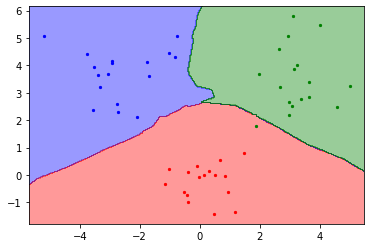

In [22]:
N = 100

def circle(c_, R_, n_):
    r = R_ * np.random.rand(n_)
    theta = np.random.rand(n_) * 2 * np.pi
    data = np.array([r * np.sin(theta) + c_[0], r * np.cos(theta) + c_[1]]).T
    return data

data1 = circle([0, 0], 2, N//3)
data2 = circle([-3, 4], 2.5, N//3)
data3 = circle([3, 4], 2.5, N//3)
labels1 = np.full(N//3, 0)
labels2 = np.full(N//3, 1)
labels3 = np.full(N//3, 2)

data_l = np.concatenate([data1[:N//6], data2[:N//6], data3[:N//6]])
data_t = np.concatenate([data1[N//6:], data2[N//6:], data3[N//6:]])
labels_l = np.concatenate([labels1[:N//6], labels2[:N//6], labels3[:N//6]])
labels_t = np.concatenate([labels1[N//6:], labels2[N//6:], labels3[N//6:]])

knn = KNN(5, data_l, labels_l)
plot(knn, data_t, labels_t)

In [23]:
import numpy as np

class KNNNotScale:
    def __init__(self, k, data, labels):
        self.k = k
        self.m = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        self.data = data
        self.labels = labels
    
    def predict(self, x):
        x_st = x
        dst = np.array([self.__distance(x_st, d) for d in self.data])
        i_nearest_k = dst.argsort()[:self.k]
        labels_nearest_k = self.labels[i_nearest_k]
        cnt = {}
        for l in labels_nearest_k:
            if l not in cnt:
                cnt[l] = 1
            else:
                cnt[l] += 1
        return max(cnt, key=cnt.get)

    def __distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def __standardize(self, d):
        """
        データを標準化する
        """
        return (d - self.m) / self.std

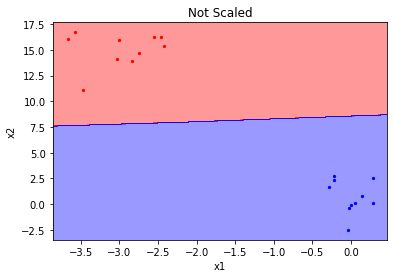

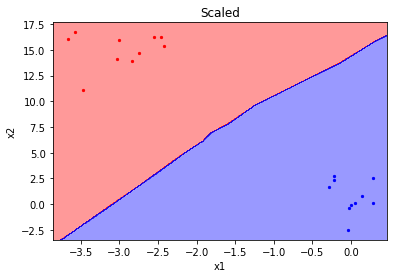

In [24]:
N = 20
c1 = [0, 0]
c2 = [-3, 4]
c2 = [-3, 15]
r1 = 2*np.random.rand(N//2)
r2 = 2.5*np.random.rand(N//2)
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([0.3*r1 * np.sin(theta1) + c1[0], 2*r1 * np.cos(theta1) + c1[1]]).T
data2 = np.array([0.3*r2 * np.sin(theta2) + c2[0], 2*r2 * np.cos(theta2) + c2[1]]).T
data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])

knn2 = KNNNotScale(3, data, labels)
plot(knn2, data, labels, 'Not Scaled', 'x1', 'x2')

knn = KNN(3, data, labels)
plot(knn, data, labels, 'Scaled', 'x1', 'x2')